In [0]:
from fastai.vision import *
from fastai.widgets import *

# Data Preparation
## Download data

I will take advantage of amazing fastai `ImageDownloader` widget for jupyter notebook 

**warning**: 
- does not work in jupyter lab or colab
- I think it is not completely stable, it may be necessary to restart the kernel for each class

In [0]:
path = './data' # where to store dowloaded data
n_images=200 # how many images per class
queries = ['cheetah acinonyx jubatus', 'leopard panthera pardus','jaguar panthera onca',
           'animal -jaguar -cheetah -leopard'] 
labels = ['cheetah', 'leopard','jaguar','other']

In [0]:
os.makedirs(path, exist_ok=True)

In [0]:
ImageDownloader(path)

In [0]:
ImageDownloader(path)

In [0]:
ImageDownloader(path)

In [0]:
ImageDownloader(path)

In [0]:
queries

['cheetah acinonyx jubatus',
 'leopard panthera pardus',
 'jaguar panthera onca',
 'animal -jaguar -cheetah -leopard']

In [0]:
# let's rename directories
! mv -v data/cheetah* data/cheetah
! mv -v data/leopard* data/leopard
! mv -v data/jaguar* data/jaguar
! mv -v data/animal* data/other

data/animal -jaguar -cheetah -leopard -> data/other


## Prepare DataBunch 



In [7]:
#if using colab, move 'data' to drive and uncomment the following lines to load data from drive

from google.colab import drive
drive.mount('/content/drive') 
path = '/content/drive/My Drive/repos/spotted_feline_classifier/data' # I put data in colab/repos/feline_classifier/data

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
np.random.seed(22)
data = ImageDataBunch\
    .from_folder(path,train=".",valid_pct=0.2,ds_tfms=get_transforms(),
                 size=224, num_workers=0)\
    .normalize(imagenet_stats)

In [16]:
data.classes

['cheetah', 'jaguar', 'leopard', 'other']

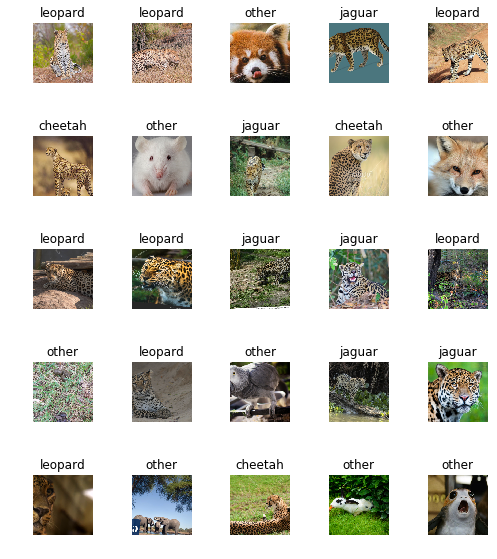

In [19]:
data.show_batch(rows=5, figsize=(7,8),)

In [18]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['cheetah', 'jaguar', 'leopard', 'other'], 4, 628, 156)

# Train model

In [20]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:00<00:00, 105226880.18it/s]


In [21]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.351245,0.414214,0.121795,03:14
1,0.864804,0.272840,0.064103,00:58
2,0.616404,0.248365,0.076923,00:51
3,0.480930,0.248011,0.070513,00:52


In [0]:
learn.save('stage-1')

In [0]:
learn.load('stage-1')

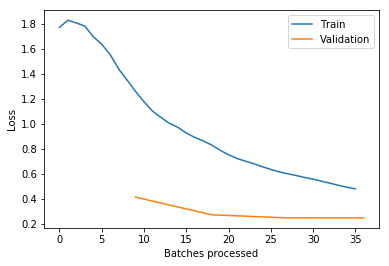

In [24]:
learn.recorder.plot_losses()

In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

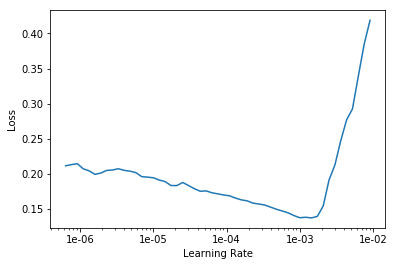

In [27]:
learn.recorder.plot()

In [46]:
learn.fit_one_cycle(1, max_lr=slice(1e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.195630,0.239710,0.057692,00:52


In [0]:
learn.save('stage-2')

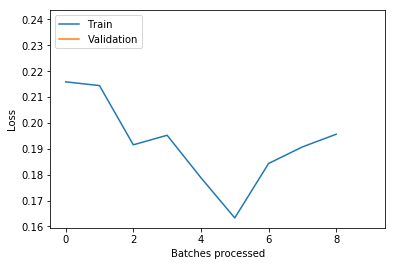

In [48]:
learn.recorder.plot_losses()

# Interpretation

In [55]:
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (628 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
leopard,leopard,leopard,leopard,leopard
Path: /content/drive/My Drive/repos/spotted_feline_classifier/data;

Valid: LabelList (156 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
leopard,leopard,cheetah,other,jaguar
Path: /content/drive/My Drive/repos/spotted_feline_classifier/data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

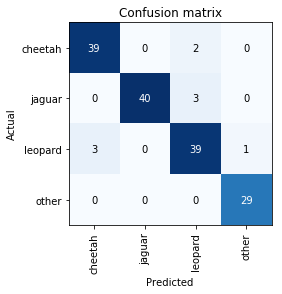

In [57]:
interp.plot_confusion_matrix()

In [0]:
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch(num_workers=0)
     )

In [0]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

learn_cln.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (599 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
leopard,leopard,leopard,leopard,leopard
Path: data;

Valid: LabelList (0 items)
x: ImageList

y: CategoryList

Path: data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False

In [0]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

In [0]:
ImageCleaner(ds, idxs, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())